In [2]:
import pandas as pd
data = pd.read_csv(r'D:\OneDrive\Desktop\rain_predict.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.drop(['Date'], axis = 1,inplace=True) 
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [6]:
data.shape

(145460, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [8]:
data['RainToday'].replace({'No':0,'Yes':1},inplace= True)
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace= True)
data.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


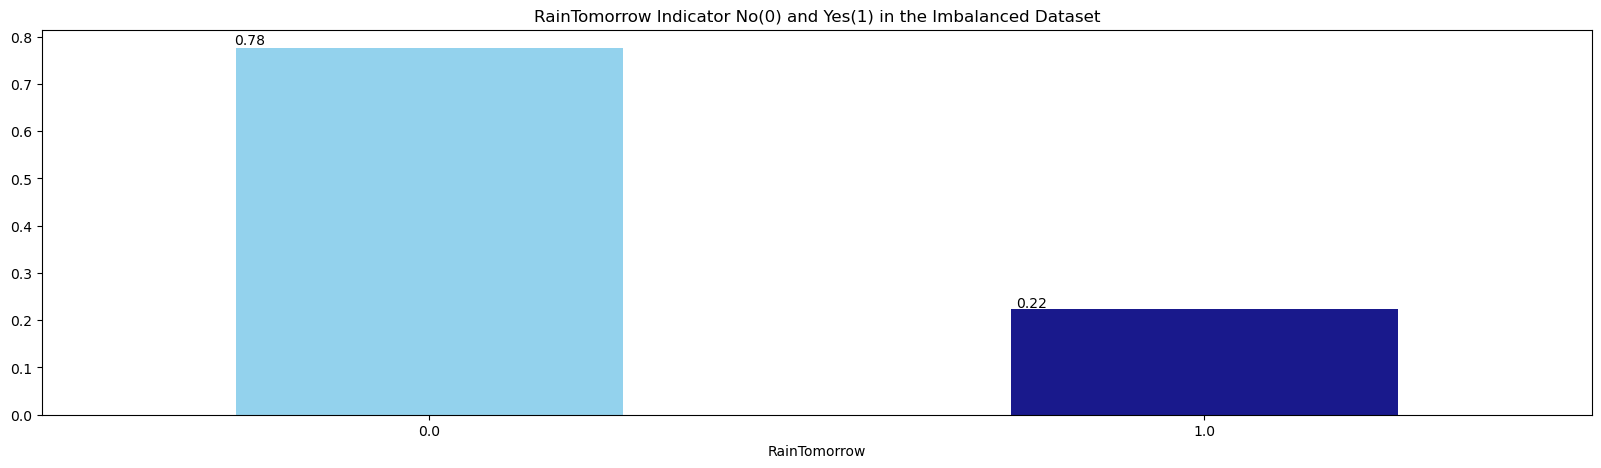

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

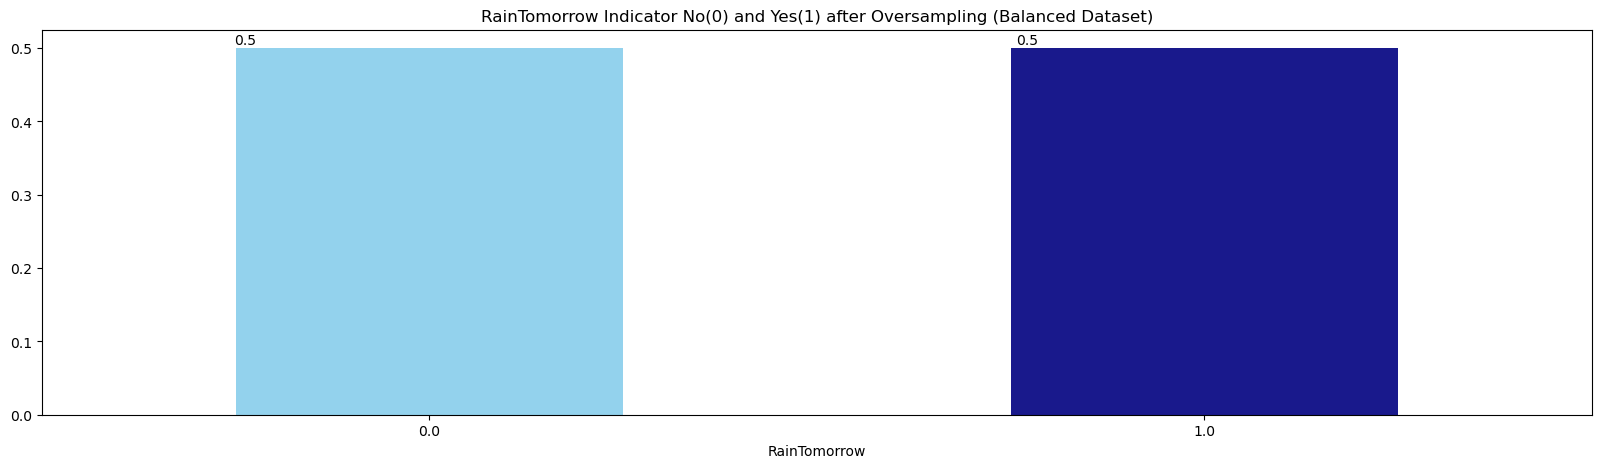

In [10]:
from sklearn.utils import resample
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

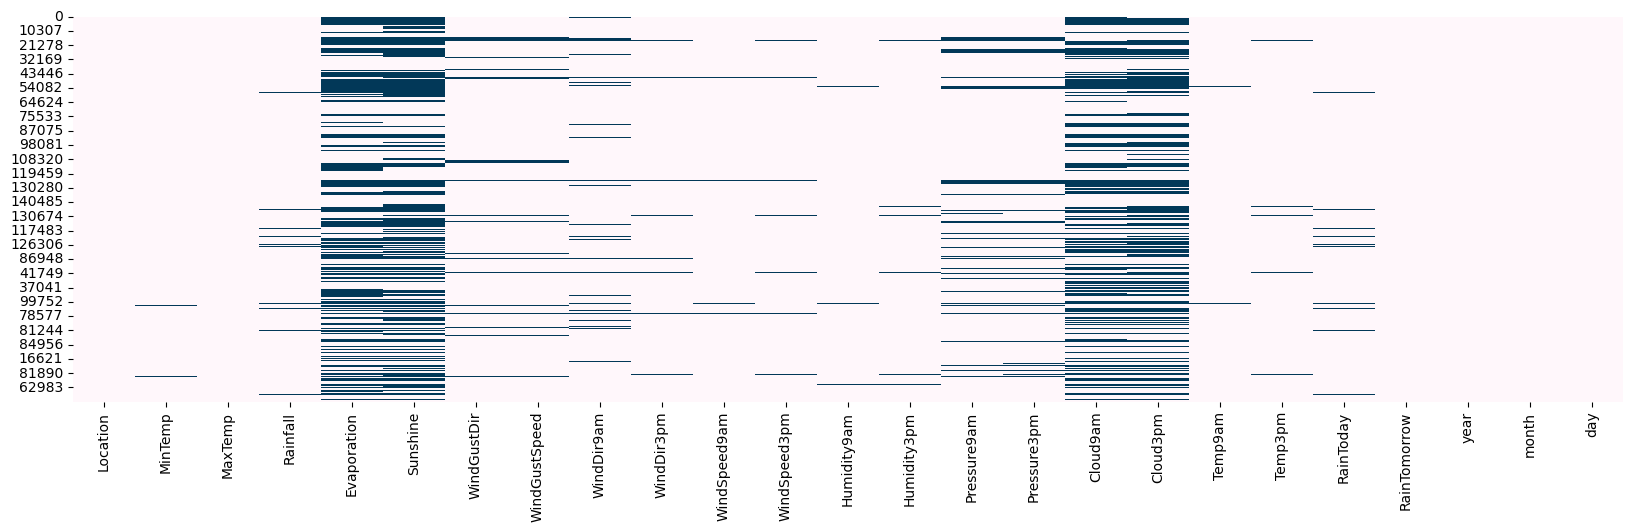

In [11]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [12]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104711,0.474596
Evaporation,95325,0.432054
Cloud3pm,85658,0.388239
Cloud9am,81388,0.368886
Pressure9am,21620,0.097991


In [13]:
oversampled.select_dtypes(include=['object']).columns


Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [14]:
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [17]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [19]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.000000
MinTemp           9.200000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.117610
Sunshine          5.961704
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.700000
Pressure3pm       8.863859
Cloud9am          4.000000
Cloud3pm          3.697490
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RainTomorrow      1.000000
year              5.000000
month             5.000000
day              15.000000
dtype: float64


In [20]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170401, 25)

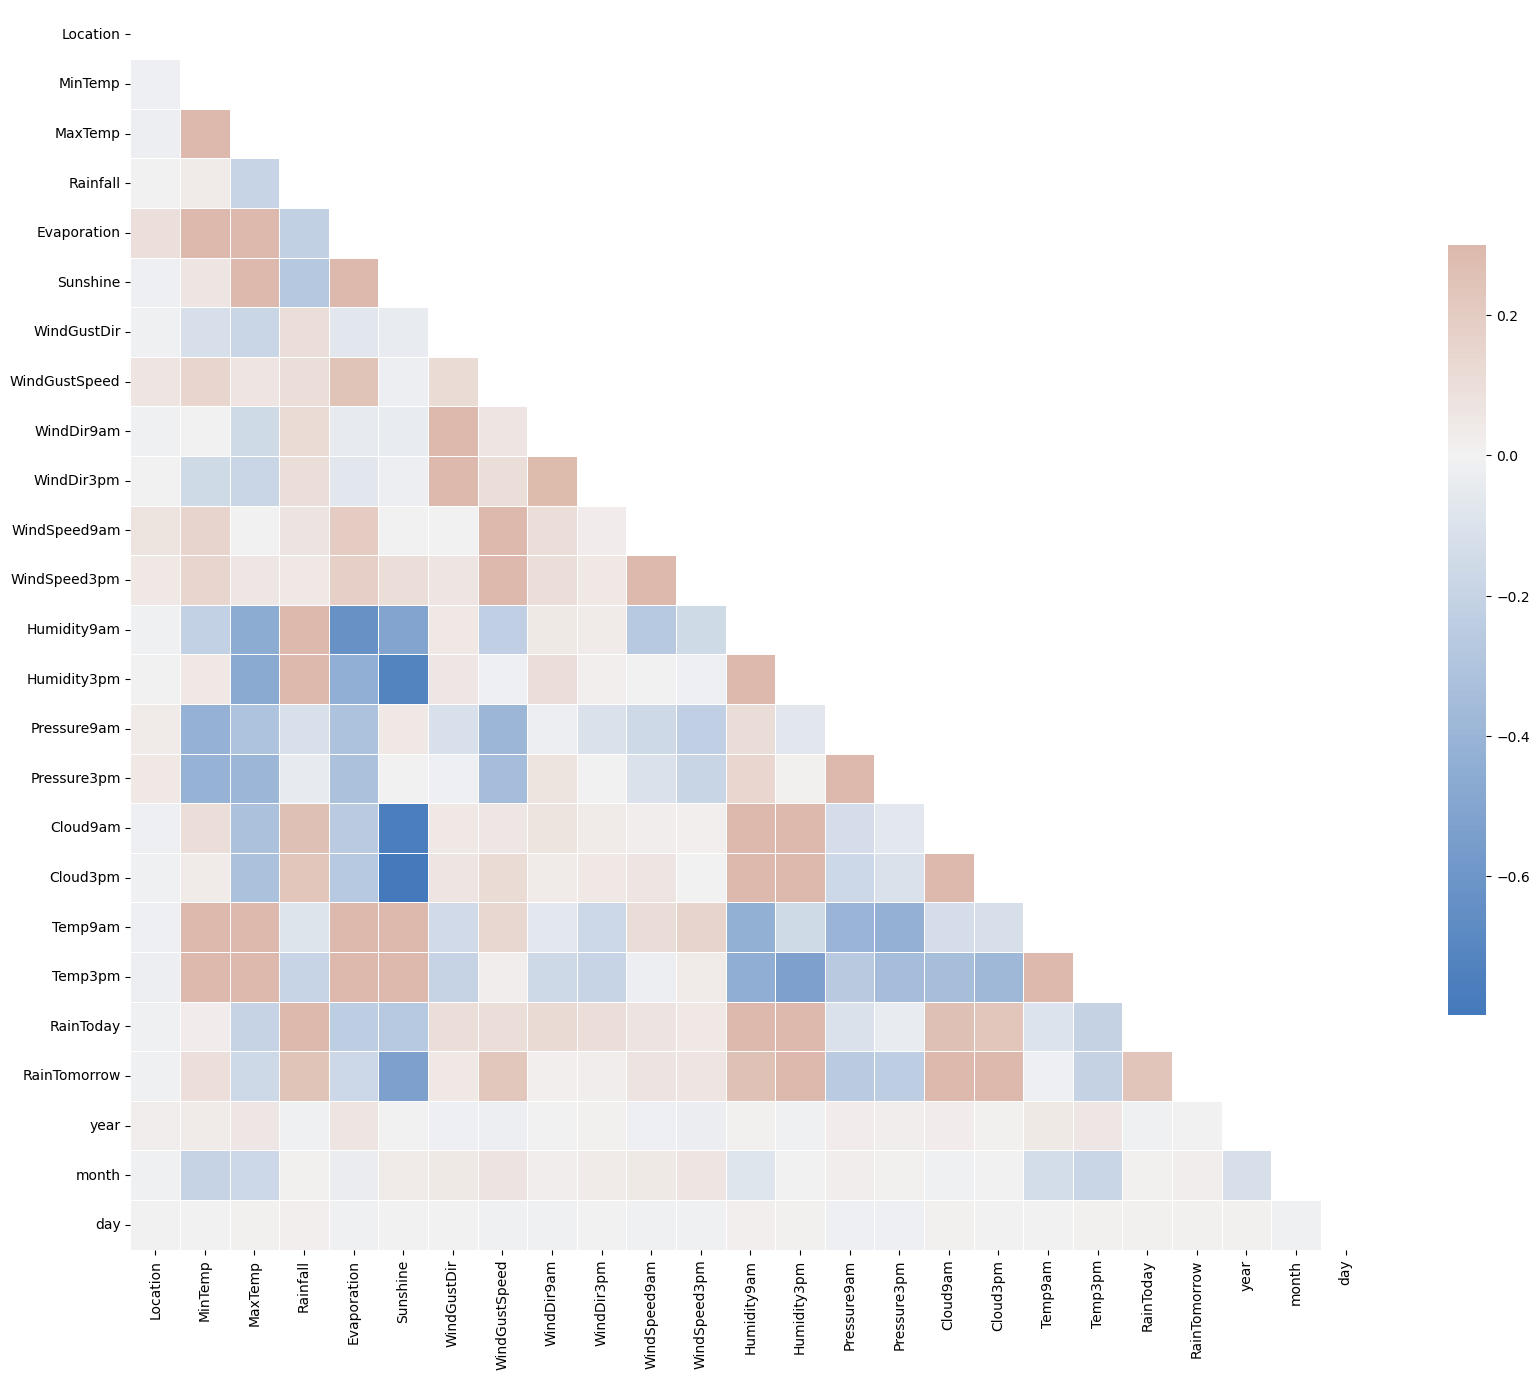

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


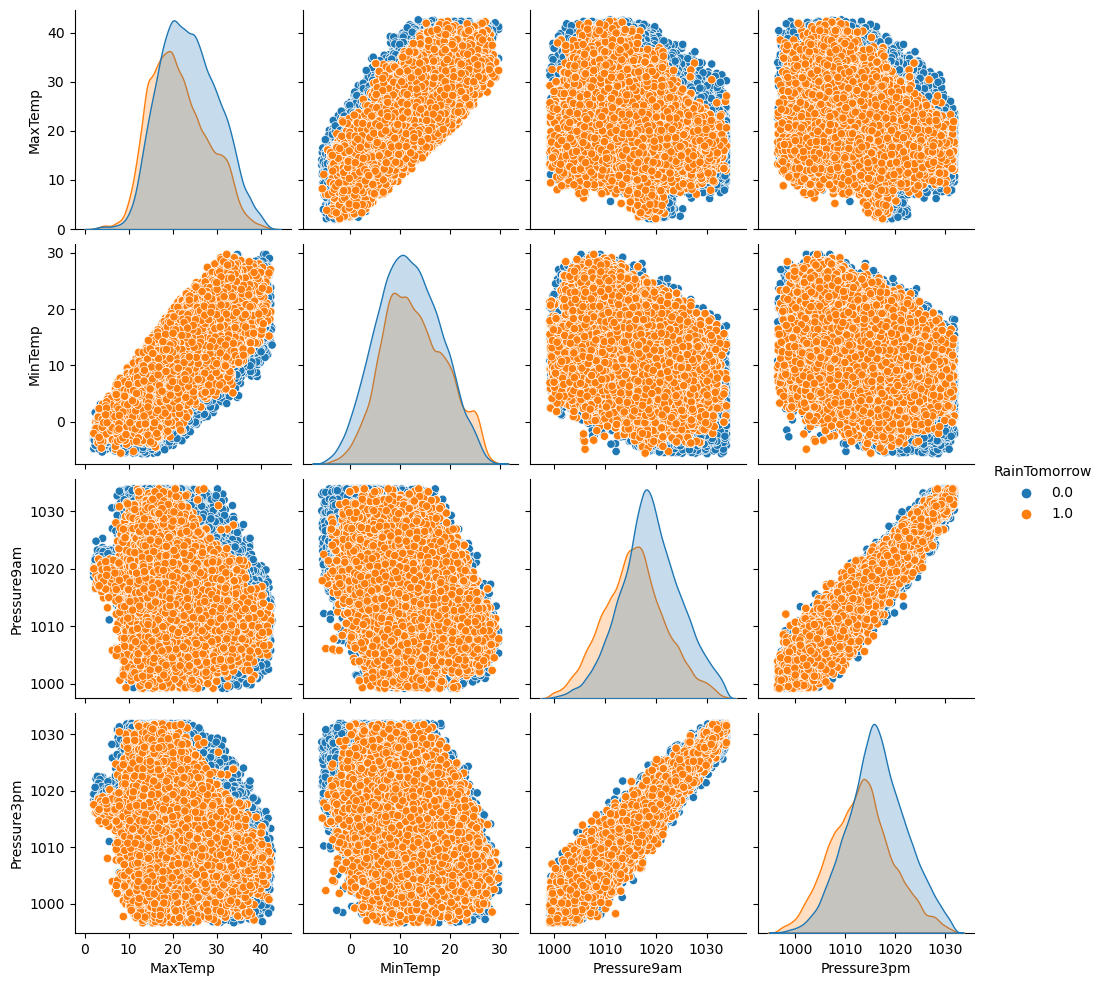

In [23]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

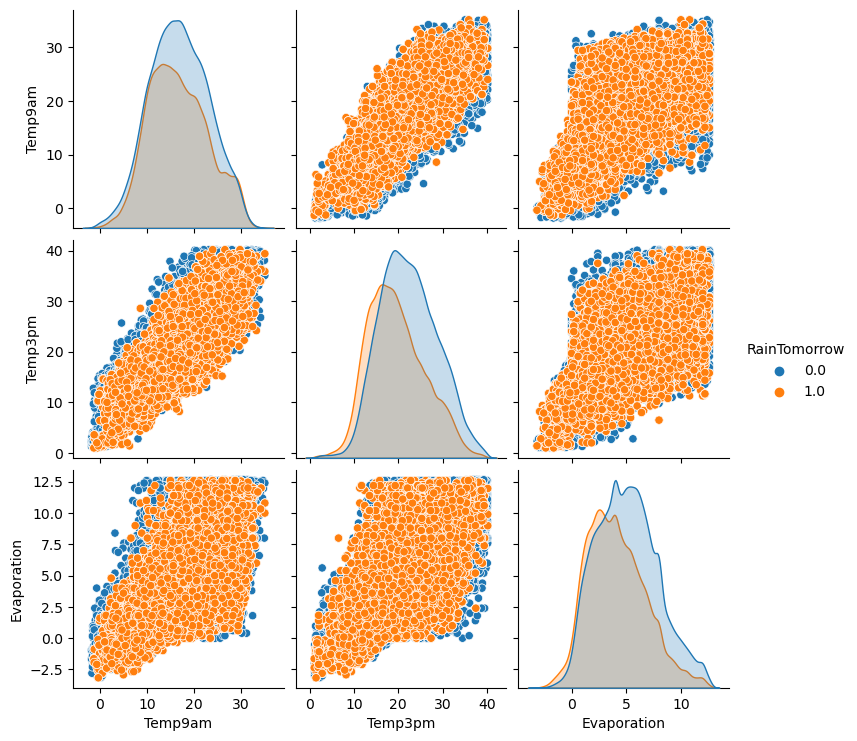

In [24]:
sns.pairplot( data=MiceImputed, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

In [25]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [26]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.02718117 0.03214722 0.0319639  0.02801273 0.03223452 0.11267362
 0.01998611 0.0419042  0.02064722 0.0210322  0.02106017 0.02272426
 0.03112416 0.11860736 0.0472595  0.05856998 0.05659081 0.13926782
 0.03094184 0.03333469 0.0133717  0.01727235 0.01858183 0.02351064]


In [28]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

In [29]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [33]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    disp.ax_.set_title("Confusion Matrix")
    plt.show()
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.7950470936885655
ROC Area under Curve = 0.7890155111099179
Cohen's Kappa = 0.5814420905217677
Time taken = 2.462937355041504
              precision    recall  f1-score   support

         0.0    0.80449   0.83844   0.82111     19120
         1.0    0.78176   0.73959   0.76009     14961

    accuracy                        0.79505     34081
   macro avg    0.79312   0.78902   0.79060     34081
weighted avg    0.79451   0.79505   0.79432     34081



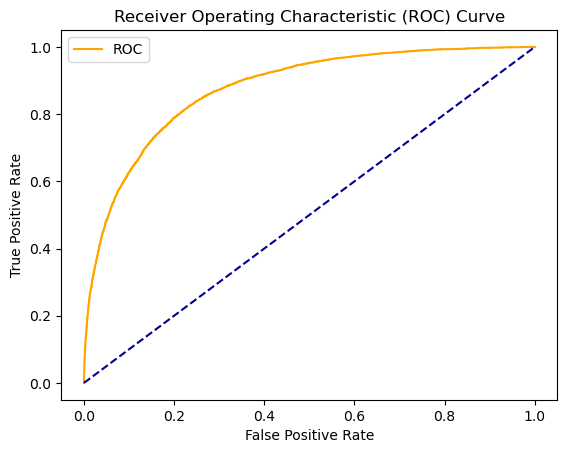

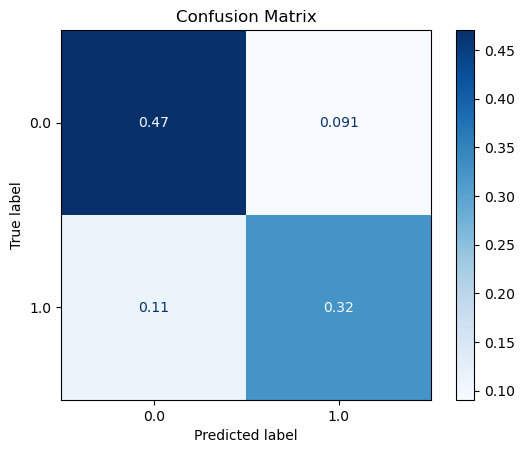

In [34]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [38]:
#!pip install lightgbm
#!pip install catboost
#!pip install xgboost

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 393.8 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.3 MB 726.2 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 913.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.3 MB 841.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.3 MB 871.5 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 930.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 819.2 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.3 MB 849.3 kB/s eta 0:00:02
   ------------- -------------------------- 0.4/1.3 MB 949.4 kB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 950.1 kB/s eta 0:00:01
   ----------

In [40]:
#!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 563.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 853.3 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 985.7 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 981.9 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   -------------- -----

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

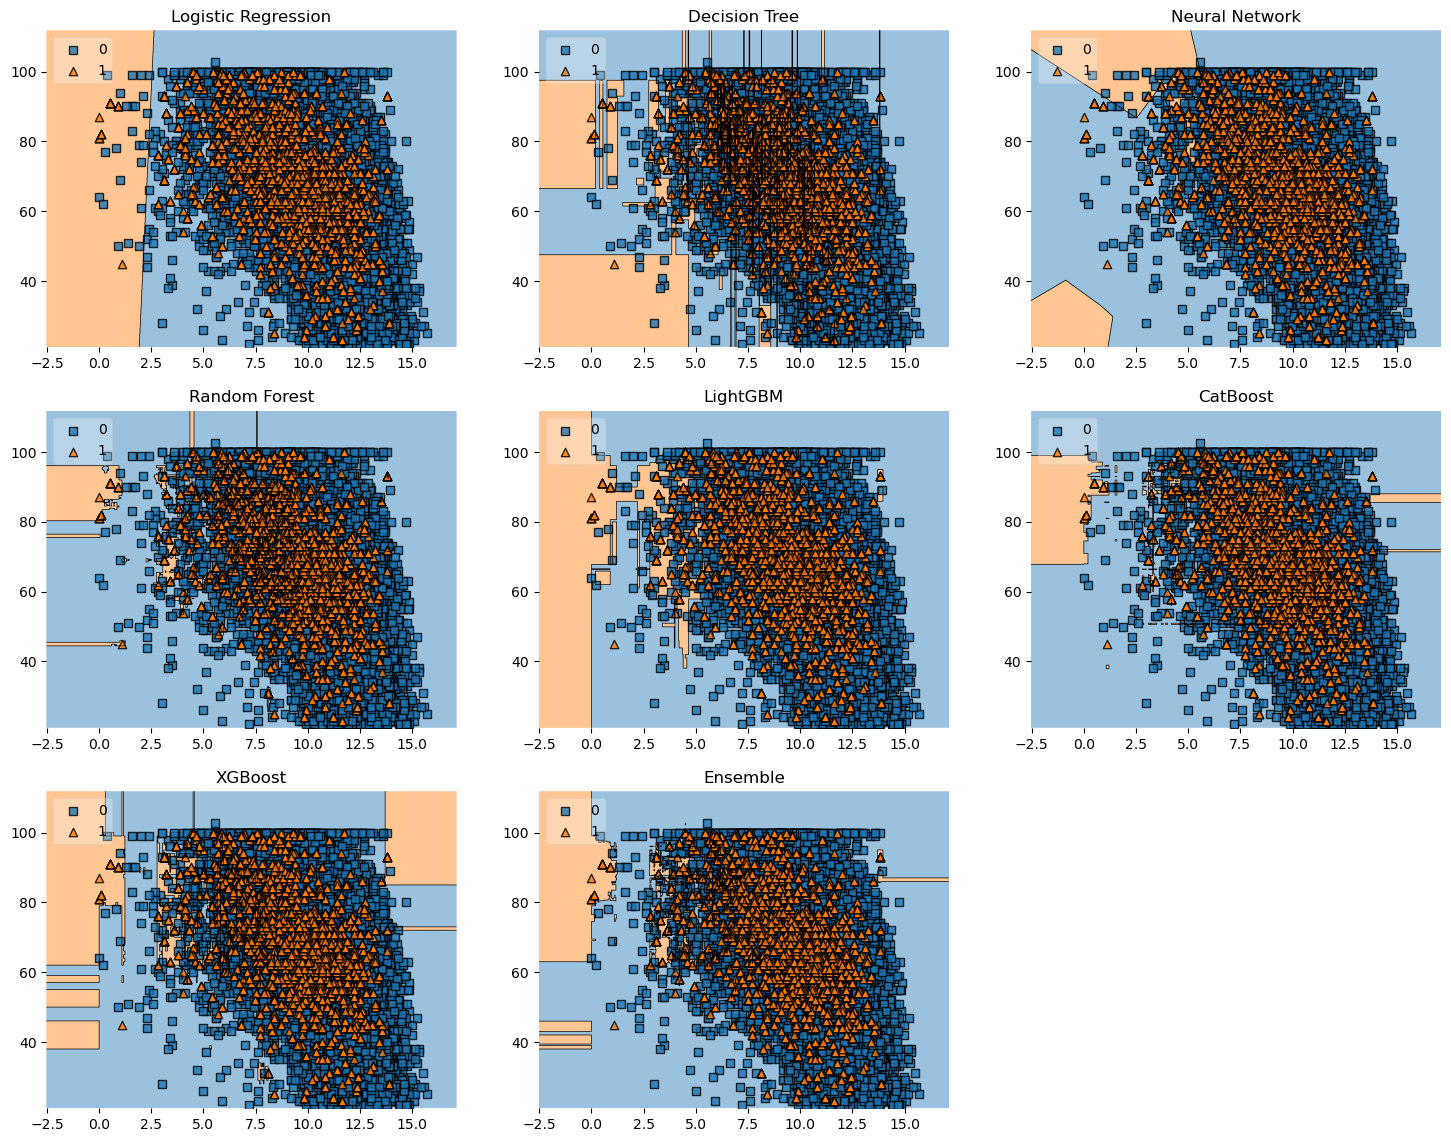

In [42]:
value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42) 
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')
X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))
labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

In [45]:
accuracy_lr = 0.85  # Example value
accuracy_dt = 0.80  # Example value
accuracy_nn = 0.88  # Example value
accuracy_rf = 0.87  # Example value
accuracy_lgb = 0.90  # Example value
accuracy_cb = 0.89  # Example value
accuracy_xgb = 0.91  # Example value

roc_auc_lr = 0.84  # Example value
roc_auc_dt = 0.81  # Example value
roc_auc_nn = 0.87  # Example value
roc_auc_rf = 0.86  # Example value
roc_auc_lgb = 0.89  # Example value
roc_auc_cb = 0.88  # Example value
roc_auc_xgb = 0.90  # Example value

coh_kap_lr = 0.83  # Example value
coh_kap_dt = 0.80  # Example value
coh_kap_nn = 0.86  # Example value
coh_kap_rf = 0.85  # Example value
coh_kap_lgb = 0.88  # Example value
coh_kap_cb = 0.87  # Example value
coh_kap_xgb = 0.89  # Example value

tt_lr = 0.1  # Example value
tt_dt = 0.2  # Example value
tt_nn = 1.5  # Example value
tt_rf = 0.4  # Example value
tt_lgb = 0.3  # Example value
tt_cb = 0.35  # Example value
tt_xgb = 0.3  # Example value


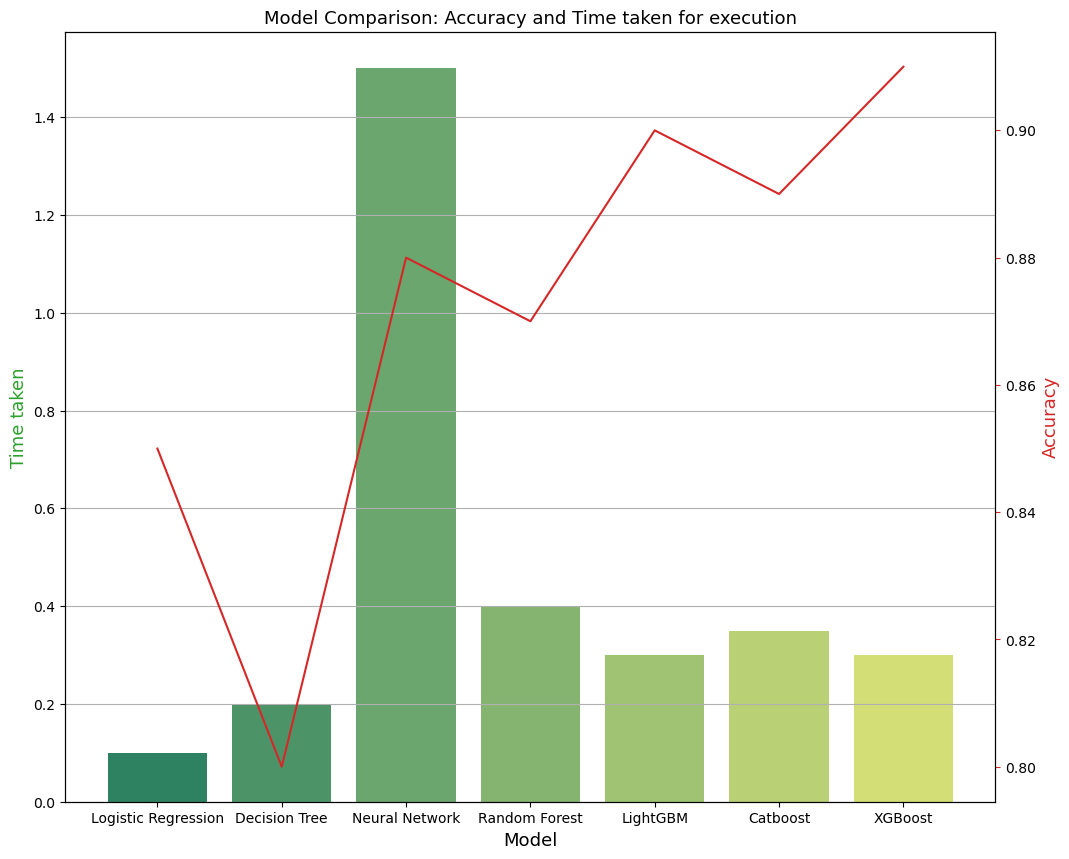

In [46]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

plt.show()


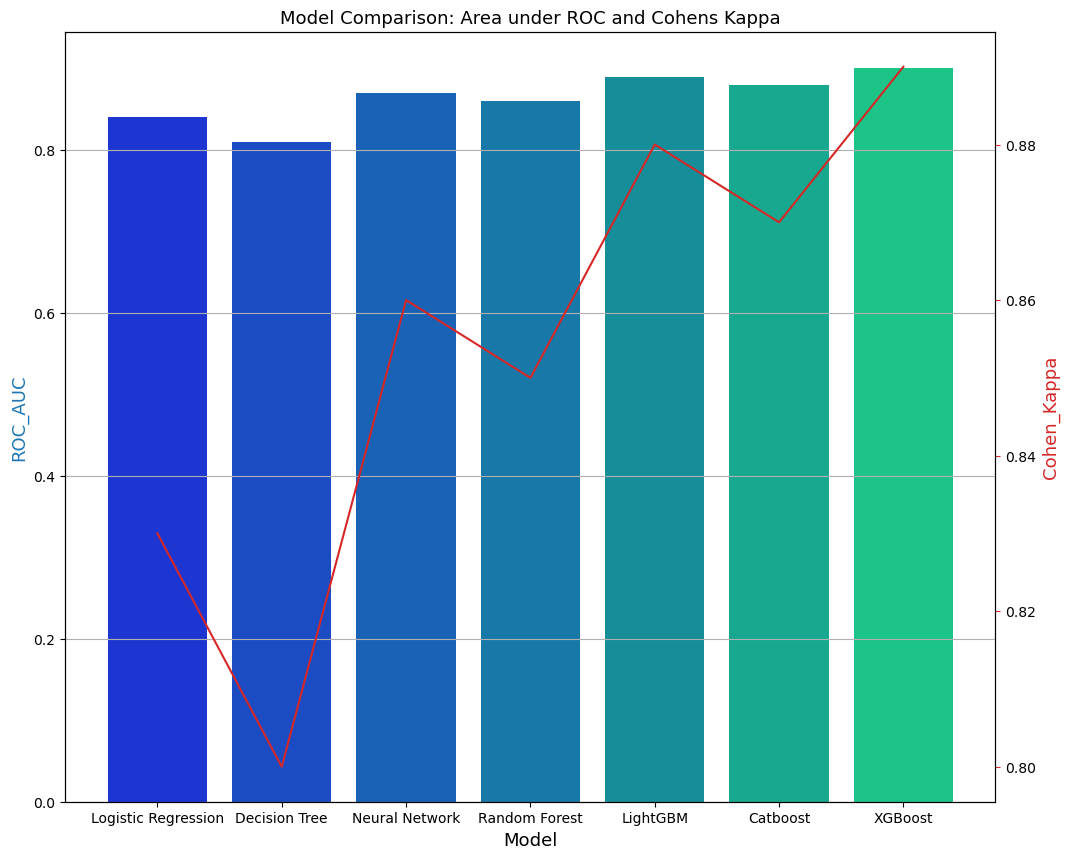

In [47]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()